In [75]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [76]:
np.random.seed(0)

In [77]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [78]:
print(X_train.shape)

(60000, 28, 28)


In [79]:
assert(X_train.shape[0]==y_train.shape[0]),"The number of images is not equal to the number of lables"
assert(X_test.shape[0]==y_test.shape[0]),"The number of images is not equal to the number of lables"
assert(X_train.shape[1:]==(28,28)),'The dimensions of images is not 28x28'
assert(X_test.shape[1:]==(28,28)),'The dimensions of images is not 28x28'

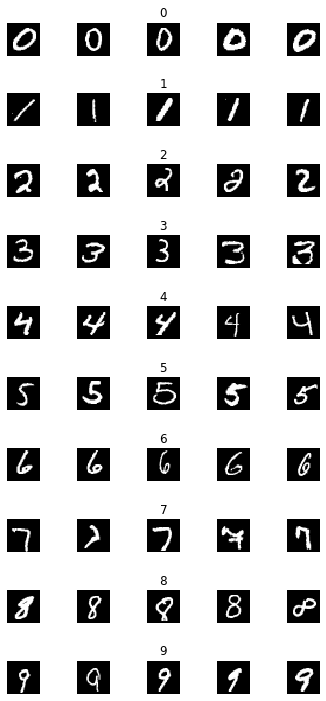

In [80]:
no_samples=[]

cols=5
no_classes=10

fig,axs=plt.subplots(nrows=no_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(no_classes):
        x_selected=X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j))
            no_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


<BarContainer object of 10 artists>

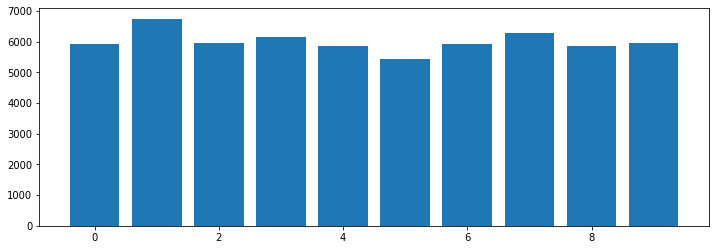

In [81]:
acti

In [82]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [83]:
X_train=X_train/255
X_test=X_test/255

In [84]:
n_pixels=784
X_train=X_train.reshape(X_train.shape[0],n_pixels)
X_test=X_test.reshape(X_test.shape[0],n_pixels)
print(X_test.shape)

(10000, 784)


In [85]:
def create_model():
    model=Sequential()
    model.add(Dense(10,input_dim=n_pixels,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(no_classes,activation='softmax'))
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    

In [86]:
model=create_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [87]:
h=model.fit(X_train,y_train,validation_split=0.1,epochs=15,batch_size=200,verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 1s 22us/step - loss: 0.6280 - accuracy: 0.8046 - val_loss: 0.3496 - val_accuracy: 0.8997
Epoch 2/15
54000/54000 [==============================] - 1s 22us/step - loss: 0.3788 - accuracy: 0.8913 - val_loss: 0.2876 - val_accuracy: 0.9142
Epoch 3/15
54000/54000 [==============================] - 1s 20us/step - loss: 0.3475 - accuracy: 0.9009 - val_loss: 0.2702 - val_accuracy: 0.9212
Epoch 4/15
54000/54000 [==============================] - 1s 21us/step - loss: 0.3254 - accuracy: 0.9065 - val_loss: 0.2658 - val_accuracy: 0.9197
Epoch 5/15
54000/54000 [==============================] - 1s 21us/step - loss: 0.3207 - accuracy: 0.9069 - val_loss: 0.2689 - val_accuracy: 0.9215
Epoch 6/15
54000/54000 [==============================] - 1s 22us/step - loss: 0.3126 - accuracy: 0.9102 - val_loss: 0.2690 - val_accuracy: 0.9218
Epoch 7/15
54000/54000 [==============================] - 1s 21us/ste

Text(0.5, 0, 'epochs')

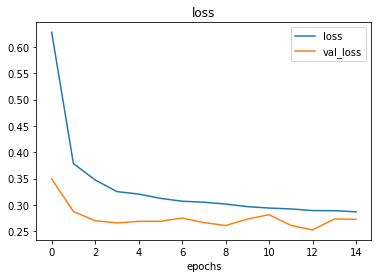

In [88]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('epochs')

In [89]:
score=model.evaluate(X_test,y_test,verbose=0)
print('Test score :',score[0])
print('Test accuracy :',score[1])

Test score : 0.3184404695570469
Test accuracy : 0.9097999930381775


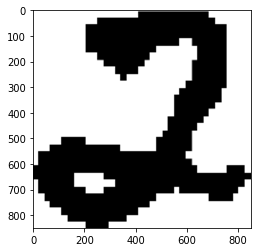

In [90]:
import requests
from PIL import Image
url='https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response=requests.get(url,stream=True)
img=Image.open(response.raw)
plt.imshow(img)


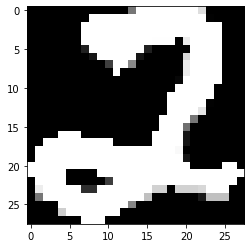

In [91]:
import cv2
img_array=np.asarray(img)
resized=cv2.resize(img_array,(28,28))
gray_scale=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
image=cv2.bitwise_not(gray_scale)
plt.imshow(image,cmap=plt.get_cmap("gray"))

In [92]:
image=image/255
image=image.reshape(1,784)


In [93]:
prediction=model.predict_classes(image)
print('Predicted Digit:',str(prediction))

Predicted Digit: [3]
